## Credit Card Fraud Detection
## Introduction

Credit card fraud is a significant issue in the financial industry, leading to substantial financial losses each year. Detecting fraudulent transactions quickly and accurately is crucial for preventing these losses and protecting consumers.

This project aims to build a machine learning model to detect fraudulent credit card transactions. The dataset used in this project, `fraudtrain.csv`, contains transaction details including whether each transaction is fraudulent.

### Objectives
1. **Data Preprocessing**: Clean and prepare the data for analysis.
2. **Exploratory Data Analysis (EDA)**: Explore the data to find patterns and insights.
3. **Feature Engineering**: Create and select relevant features for the model.
4. **Modeling**: Train various machine learning models to predict fraudulent transactions.
5. **Model Evaluation**: Evaluate the performance of the models using appropriatmprovements.

By the end of this project, we aim to identify the best-performing model for fraud detection and understand the key factors that contribute to fraudulent transactions.
lusion

## Data Preprocessing

In [90]:
#Importing the necessary libraries
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [91]:
#Loading the dataset
df = pd.read_csv('fraudtrain.csv')

In [92]:
#Previewing the Data
df.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


In [93]:
#Checking for Missing Values
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [94]:
# Checking the shape of the DataFrame
df.shape

(1296675, 23)

In [95]:
# Listing the columns of the DataFrame
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [96]:
#Dropping Duplicate values
df.drop_duplicates(inplace = True)

In [97]:
# Previewing the Data after dropping duplicates
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


### Data Cleaning

In [99]:
def clean_data(clean):
    clean.drop(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'first', 'last','street', 'city', 'state', 'zip','dob', 'trans_num'],axis=1,inplace = True)
    clean.dropna()
    return clean

In [100]:
clean_data(df)

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0
2,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154,Nature conservation officer,1325376051,43.150704,-112.154481,0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939,Patent attorney,1325376076,47.034331,-112.561071,0
4,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,fraud_Reichel Inc,entertainment,15.56,M,37.7175,-112.4777,258,Geoscientist,1371816728,36.841266,-111.690765,0
1296671,fraud_Abernathy and Sons,food_dining,51.70,M,39.2667,-77.5101,100,"Production assistant, television",1371816739,38.906881,-78.246528,0
1296672,fraud_Stiedemann Ltd,food_dining,105.93,M,32.9396,-105.8189,899,Naval architect,1371816752,33.619513,-105.130529,0
1296673,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,43.3526,-102.5411,1126,Volunteer coordinator,1371816816,42.788940,-103.241160,0


## Feature Engineering


In [102]:
encoder = LabelEncoder()
def encode(data):
    data['merchant'] = encoder.fit_transform(data['merchant'])
    data['category'] = encoder.fit_transform(data['category'])
    data['gender']   = encoder.fit_transform(data['gender'])
    data['job']      = encoder.fit_transform(data['job'])
    return data
    

In [103]:
encode(df)

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,514,8,4.97,0,36.0788,-81.1781,3495,370,1325376018,36.011293,-82.048315,0
1,241,4,107.23,0,48.8878,-118.2105,149,428,1325376044,49.159047,-118.186462,0
2,390,0,220.11,1,42.1808,-112.2620,4154,307,1325376051,43.150704,-112.154481,0
3,360,2,45.00,1,46.2306,-112.1138,1939,328,1325376076,47.034331,-112.561071,0
4,297,9,41.96,1,38.4207,-79.4629,99,116,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,499,0,15.56,1,37.7175,-112.4777,258,215,1371816728,36.841266,-111.690765,0
1296671,2,1,51.70,1,39.2667,-77.5101,100,360,1371816739,38.906881,-78.246528,0
1296672,599,1,105.93,1,32.9396,-105.8189,899,308,1371816752,33.619513,-105.130529,0
1296673,509,1,74.90,1,43.3526,-102.5411,1126,485,1371816816,42.788940,-103.241160,0


### EDA

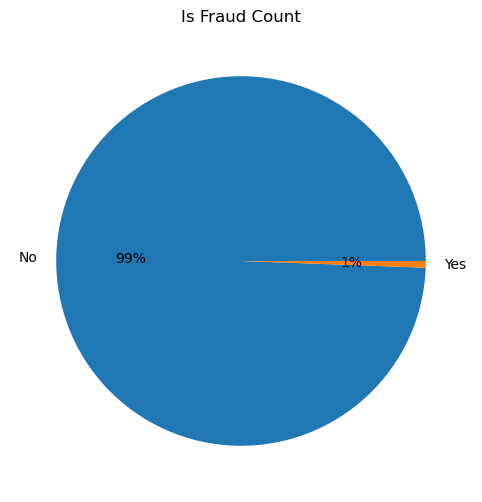

In [105]:
#Using Pie chart
exit_count = df['is_fraud'].value_counts()
plt.figure(figsize=(12,6))
plt.pie(exit_count,labels=['No','Yes'],autopct="%0.0f%%")
plt.title('Is Fraud Count')
plt.show()

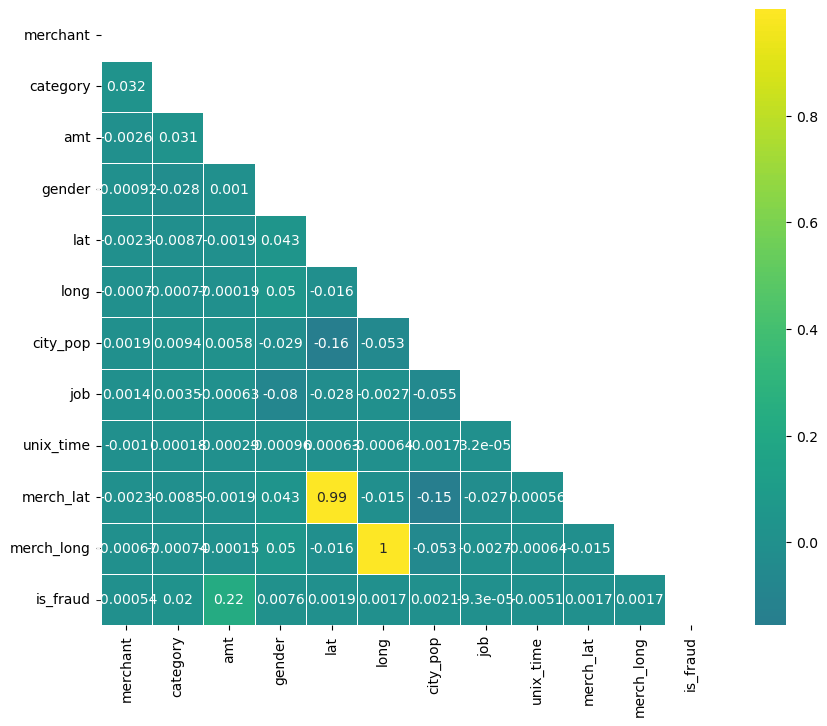

In [106]:
#Correlation Analysis
corr = df.corr()
#Creating mask for the upper triangle
mask = np.triu(np.ones_like(corr,dtype = bool))
plt.figure(figsize=(10,8))
#heatmap
sns.heatmap(corr,mask = mask,annot = True,cmap='viridis',center=0,square = True,linewidths=0.5)
plt.show()

## Modeling

In [108]:
# Splitting the dataset
x = df.drop(columns=['is_fraud'])
y = df['is_fraud']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initializing the models
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()

# Training the Logistic Regression model
model1.fit(x_train, y_train)

# Training the Decision Tree Classifier
model2.fit(x_train, y_train)


DecisionTreeClassifier()

## Model Evaluation

In [110]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def print_score(test, pred, model):
    print(f"Classifier: {model}")
    print(f"Accuracy: {accuracy_score(test, pred)}")
    print(f"Classification Report:\n{classification_report(test, pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(test, pred)}")

# Evaluating the Logistic Regression model
y_pred = model1.predict(x_test)
print_score(y_test, y_pred, 'Logistic Regression')

# Evaluating the Decision Tree Classifier
y_pred2 = model2.predict(x_test)
print_score(y_test, y_pred2, 'Decision Tree Classifier')

# Storing model results
models = ['Logistic Regression', 'Decision Tree Classifier']
acc_scores = [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred2)]

# Creating a DataFrame to store model results
model_results = pd.DataFrame({
    "Model": models,
    "Accuracy_Score": acc_scores,
})

model_results


Classifier: Logistic Regression
Accuracy: 0.9941388551487458


C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    257815
           1       0.00      0.00      0.00      1520

    accuracy                           0.99    259335
   macro avg       0.50      0.50      0.50    259335
weighted avg       0.99      0.99      0.99    259335

Confusion Matrix:
[[257815      0]
 [  1520      0]]
Classifier: Decision Tree Classifier
Accuracy: 0.9959280467349182
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.65      0.67      0.66      1520

    accuracy                           1.00    259335
   macro avg       0.82      0.83      0.83    259335
weighted avg       1.00      1.00      1.00    259335

Confusion Matrix:
[[257258    557]
 [   499   1021]]


,Model,Accuracy_Score
0,Logistic Regression,0.994139
1,Decision Tree Classifier,0.995928
